In [ ]:
#Packages needed

#!pip install tensorflow
#!pip install librosa
#!pip install soundfile
#!pip install -U scikit-learn
#!pip install --upgrade pip
#!pip install pandas
#!pip install python_speech_features
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz


In [ ]:
# Imports
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import wave
import contextlib
from time import time
import csv
import pandas as pd
import os
from random import randrange
import librosa, librosa.display
from tensorflow.keras import layers, models, losses
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from python_speech_features import mfcc
import copy 
from sklearn.utils import shuffle
import seaborn as sn
import pandas as pd

import pydot
import pydotplus
from pydotplus import graphviz

import glob
import importlib

In [ ]:
import MFCCs_functions as MFCC

# This file contains the following functions :

# get_MFCCs() : This function return the MFCCs_dict of all the MFCCs stores in the folder MFCCs

# get_Speaker(Languages,Native_countries,MFCCs_dict={},Comment = False): 
#This function get the Speaker dictionnary acording to the list of Languages desired and the list of Native_countries for the labels.
# If youy already download the MFCCs_dict, Speaker will only take into account the files in MFCCs_dict.

# shuffle_MFCCs(Speaker,Comment = False):
# This function shuffle the MFCCs for the training set and the testing set (no return)

# calculate_MFCCs(Speaker,Augmentation = False, MFCCs_dict={}):
# This function calculate the MFCCs of the files in speaker.
# You can put Augmentation = True if you want to calculate the MFCCs of the augmented dataset
# You can add the MFCCs_dict if you don't want to calculate again the MFCCs from the files stored in this dictionnary.

# get_train_test_set(MFCCs_dict,Speaker,Augmentation=False,Cutting =False,Comment=False)
# This function get the MFFCs_list for the training and test set and the labels_list associated
# If you choose Cutting = True, your data are split into array of size 400 equal to 4 sec of speech.
# The return is the following one : ((MFCCs_list_train,labels_list_train),(MFCCs_list_test,labels_list_test))

#shuffle_set(MFCCs_list,labels_list)
# This function shuffle the value store in the list of the MFCCs and the labels once you have your training and testing set.
# You need to use it after get_train_test_set and apply this function on your training set and you test set independently
# No return

# savecsv_MFCCs(MFCCs_dict):
# save the MFCCs stored in MFCCs_dict into the MFCCs folder.



In [ ]:
# If you are doing some modification to MFCCs.py file run it
import MFCCs_functions
importlib.reload(MFCCs_functions)


<module 'MFCCs_functions' from '/home/jovyan/work/MFCCs_functions.py'>

In [ ]:
MFCCs_dict = MFCC.get_MFCCs()

998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
944
943
942
941
940
939
938
937
936
935
934
933
932
931
930
929
928
927
926
925
924
923
922
921
920
919
918
917
916
915
914
913
912
911
910
909
908
907
906
905
904
903
902
901
900
899
898
897
896
895
894
893
892
891
890
889
888
887
886
885
884
883
882
881
880
879
878
877
876
875
874
873
872
871
870
869
868
867
866
865
864
863
862
861
860
859
858
857
856
855
854
853
852
851
850
849
848
847
846
845
844
843
842
841
840
839
838
837
836
835
834
833
832
831
830
829
828
827
826
825
824
823
822
821
820
819
818
817
816
815
814
813
812
811
810
809
808
807
806
805
804
803
802
801
800
799
798
797
796
795
794
793
792
791
790
789
788
787
786
785
784
783
782
781
780
779
778
777
776
775
774
773
772
771
770
769
768
767
766
765
764
763
762
761
760
759
758
757
756
755
754
753
752
751
750
749


In [ ]:
Languages = ['english','french','italian','russian','spanish', 'arabic', 'japanese']

Speaker = MFCC.get_Speaker(Languages,MFCCs_dict=MFCCs_dict, Comment = True)

The columns of the file are : ['Unnamed: 0', 'speakerid', 'filename', 'birthplace', 'native_language', 'age', 'sex', 'age_onset', 'residence']
Processed {row} lines.
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
MFCC.shuffle_MFCCs(Speaker, Comment = True)

1289
Size of the test set (without considering augmentation :  128
Number of Native male in the test :  32
Number of Native female in the test :  32
Number of Non-Native female in the test :  32
Number of Non-Native female in the test :  32
Your training and testing set were shuffled again


In [ ]:
# List with all the Native_Speaker
Native_Speaker = [speaker for speaker in Speaker if Speaker[speaker]['label']==1]
print(len(Native_Speaker))

644


In [ ]:
((MFCCs_list_train,labels_list_train),(MFCCs_list_test,labels_list_test))=MFCC.get_train_test_set(MFCCs_dict,Speaker,Augmentation=True,Cutting=False,Comment=True)


You are recuperate the data with augmentation
Size of training data :  3483
Size of the labels of the training data :  3483
Size of test data :  384
Size of the labels of the training data :  384
Shape of MFCCs :  (13, 2999)


In [ ]:
print(len(MFCCs_dict)/3)
print(len(Speaker))

1289.0
1289


In [ ]:
training_set = np.stack(MFCCs_list_train)
training_labels = np.array(labels_list_train)



test_set = np.stack(MFCCs_list_test)
test_labels = np.array(labels_list_test)



In [ ]:
print(training_set.shape)
print(training_labels.shape)

print(test_set.shape)
print(test_labels.shape)

(3483, 13, 2999)
(3483,)
(384, 13, 2999)
(384,)


In [ ]:
MFCC_shape = (training_set.shape[1], training_set.shape[2]) #Input shape

In [ ]:
#Run 1 out of 4 models below

#AR Model - 73% test accuracy

model = models.Sequential()
model.add(layers.LSTM(200, activation = 'tanh', return_sequences = True, input_shape = (MFCC_shape)))
model.add(layers.LSTM(100, activation = 'tanh', return_sequences = True))
model.add(layers.LSTM(50, activation = 'tanh',  return_sequences = True))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(35, activation = 'tanh', return_sequences = True))
model.add(layers.LSTM(20, activation = 'tanh',  return_sequences = True))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(18, activation = 'tanh',  return_sequences = True))
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(16, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPool1D(pool_size = 2, padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) # 1 classes - native or non native english speaker
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.99),
             loss = 'binary_crossentropy', metrics=['accuracy']) 
model.summary()


tf.keras.utils.plot_model(model, show_shapes=True, to_file="accent_model.png")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 13, 200)           2560000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 13, 100)           120400    
_________________________________________________________________
lstm_8 (LSTM)                (None, 13, 50)            30200     
_________________________________________________________________
batch_normalization_6 (Batch (None, 13, 50)            200       
_________________________________________________________________
lstm_9 (LSTM)                (None, 13, 35)            12040     
_________________________________________________________________
lstm_10 (LSTM)               (None, 13, 20)            4480      
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 20)           

In [ ]:
#1D Convolutional model - 78% test accuracy
cnn_model = models.Sequential()
cnn_model.add(layers.Conv1D(filters=64,
                        kernel_size=50,
                        input_shape=MFCC_shape,
                        padding='same',
                        activation='relu'
                        ))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Conv1D(filters=64,
                        kernel_size=25,
                        padding='same',
                        activation='relu'
                        ))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(pool_size=2))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Conv1D(filters=64,
                        kernel_size=25,
                        padding='same',
                        activation='relu'
                        ))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(pool_size=2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(1, activation = 'sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 13, 64)            9596864   
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 64)            0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 13, 64)            256       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 13, 64)            102464    
_________________________________________________________________
batch_normalization_10 (Batc (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 64)            

In [ ]:
#2D Convolutional model
INPUT_SHAPE = (13, 2999, 32)
cnn2_model = models.Sequential()
cnn2_model.add(layers.Input(INPUT_SHAPE))
cnn2_model.add(layers.Conv2D(100, (3, 11), strides=(1, 1), activation = 'relu'))
cnn2_model.add(layers.BatchNormalization())
cnn2_model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn2_model.add(layers.Dropout(0.3))
cnn2_model.add(layers.Dense(512, activation='relu'))
cnn2_model.add(layers.Dropout(0.4))
cnn2_model.add(layers.Dense(512, activation='relu'))
cnn2_model.add(layers.Dropout(0.4))
cnn2_model.add(layers.Dense(128, activation='relu'))
cnn2_model.add(layers.Dropout(0.3))
cnn2_model.add(layers.Dense(1, activation='sigmoid'))
cnn2_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01),
                     metrics=["accuracy"])
cnn2_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 2989, 100)     3400      
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 2989, 100)     400       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 1494, 100)      0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 1494, 100)      0         
_________________________________________________________________
dense (Dense)                (None, 5, 1494, 512)      51712     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 1494, 512)      0         
_________________________________________________________________
dense_1 (Dense)              (None, 5, 1494, 512)     

In [ ]:
training_set, training_labels = shuffle(training_set, training_labels)

accent_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='accuracy',min_delta=1e-2,patience=10,verbose=1),
    tf.keras.callbacks.ModelCheckpoint(filepath='/home/jovyan/work/checkpoints/accent_best_cnn.hdf5',
                                        save_best_only=True, monitor='val_accuracy',
                                        verbose=1)
]

nepochs = 60
print('Fit model on training data and validation data : ')
ar_history = cnn_model.fit(training_set, training_labels, validation_split = 0.2, epochs = nepochs, batch_size = 10, callbacks = accent_callbacks)

print('\nhistory dict:', ar_history.history)

Fit model on training data and validation data : 
Epoch 1/60
279/279 [==============================] - ETA: 0s - loss: 0.7487 - accuracy: 0.6694
Epoch 00001: val_accuracy improved from -inf to 0.74462, saving model to /home/jovyan/work/checkpoints/accent_best_cnn.hdf5
279/279 [==============================] - 8s 27ms/step - loss: 0.7487 - accuracy: 0.6694 - val_loss: 0.5831 - val_accuracy: 0.7446
Epoch 2/60
277/279 [============================>.] - ETA: 0s - loss: 0.5773 - accuracy: 0.7289
Epoch 00002: val_accuracy did not improve from 0.74462
279/279 [==============================] - 6s 22ms/step - loss: 0.5776 - accuracy: 0.7283 - val_loss: 0.5516 - val_accuracy: 0.7188
Epoch 3/60
277/279 [============================>.] - ETA: 0s - loss: 0.4998 - accuracy: 0.7704
Epoch 00003: val_accuracy improved from 0.74462 to 0.77188, saving model to /home/jovyan/work/checkpoints/accent_best_cnn.hdf5
279/279 [==============================] - 7s 25ms/step - loss: 0.4993 - accuracy: 0.7706 - 

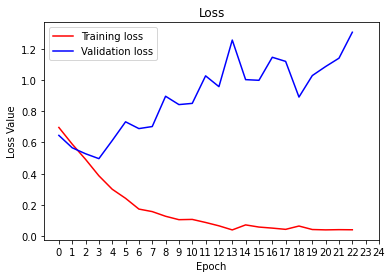

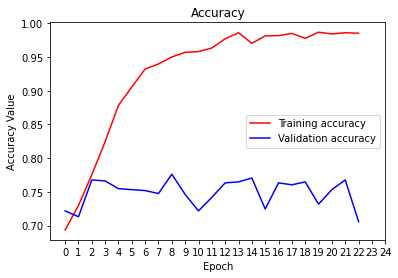

In [ ]:
#Training and Validation loss plot

if nepochs > 20:
    jump = 5
else:
    jump = 1

training_loss = ar_history.history['loss']
val_loss = ar_history.history['val_loss']

plt.figure()
plt.plot(training_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
#plt.ylim([0, 2])
plt.xticks(np.arange(0, 25, 1))
plt.legend()
#plt.savefig('results/2mlossN' + str(nepochs)  + 'e_Ag.png')
plt.show()


#Training and Validation accuracy plot
training_acc = ar_history.history['accuracy']
val_acc = ar_history.history['val_accuracy']


plt.figure()
plt.plot(training_acc, 'r', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
#plt.ylim([0, 1])
plt.xticks(np.arange(0, 25, 1))
plt.legend()
#plt.savefig('results/2maccN' + str(nepochs)  + 'e_Ag.png')
plt.show()

384/384 [==============================] - 3s 9ms/step - loss: 1.0167 - accuracy: 0.7578


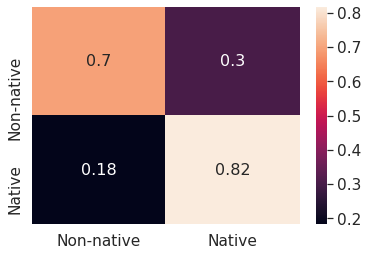

In [ ]:
cnn_model.load_weights('/home/jovyan/work/checkpoints/accent_best_cnn.hdf5')

result = cnn_model.evaluate(test_set, test_labels, batch_size = 1)

test_predictions = cnn_model.predict(test_set, batch_size=1)

cnf_mat = confusion_matrix(test_labels, test_predictions.round(), labels=[0, 1])
nmatrix = cnf_mat.astype('float') / cnf_mat.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(nmatrix, ['Non-native', 'Native'], ['Non-native', 'Native'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.savefig('results/cnfmatrix_cnn_model.png')
plt.show()

384/384 [==============================] - 2s 6ms/step - loss: 0.5991 - accuracy: 0.7031


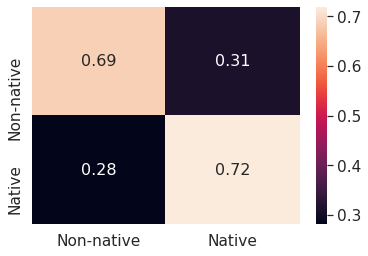

In [ ]:
model.load_weights('/home/jovyan/work/checkpoints/accent_best_lstm.hdf5')

result = model.evaluate(test_set, test_labels, batch_size = 1)

test_predictions = model.predict(test_set, batch_size=1)

cnf_mat = confusion_matrix(test_labels, test_predictions.round(), labels=[0, 1])
nmatrix = cnf_mat.astype('float') / cnf_mat.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(nmatrix, ['Non-native', 'Native'], ['Non-native', 'Native'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.savefig('results/cnfmatrix_lstm_model.png')
plt.show()

In [0]:
import shelve

f=open('/home/jovyan/work/dataaugmentest/Testshelve','w')
f.write(repr(Speaker_augment)+'\r\n')
f.close()

f = open('/home/jovyan/work/dataaugmentest/Testshelve','r')
Speaker_augmenttest=eval(f.readline().rstrip('\r\n'))
f.close()

print(Speaker_augmenttest)

In [0]:
signal, sr = librosa.load('dataaugmentest/english1_100.wav')
